In [22]:
import tensorflow as tf
import keras
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
model = keras.models.load_model('my_first_mnist.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
type(x_train)

numpy.ndarray

5 3


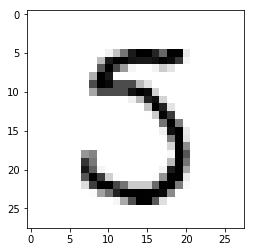

In [16]:
index = 7080
a = model.predict(x_train[index].reshape(1,28,28,1))
pred = a.argmax()
real = y_train[index]
print(pred, real)
plt.imshow(x_train[index], cmap="Greys")


In [43]:
y_pred = model.predict(x_test.reshape(10000,28, 28, 1))
y_pred = np.apply_along_axis(np.argmax, 1, y_pred)
y_df = pd.DataFrame([y_pred, y_test])
print(y_df.shape)
y_df = y_df.T
print("After transpose:", y_df.shape)

(2, 10000)
After transpose: (10000, 2)


In [44]:
y_df.head()

,0,1
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [51]:
wrong = y_df.loc[y_df[0] != y_df[1]]

Number of false predicted image: 241
The first 25 indexes of wrong predict images: [8, 151, 247, 259, 321, 340, 381, 445, 495, 578, 582, 591, 684, 691, 720, 726, 740, 760, 810, 839, 947, 951, 956, 965, 1014]


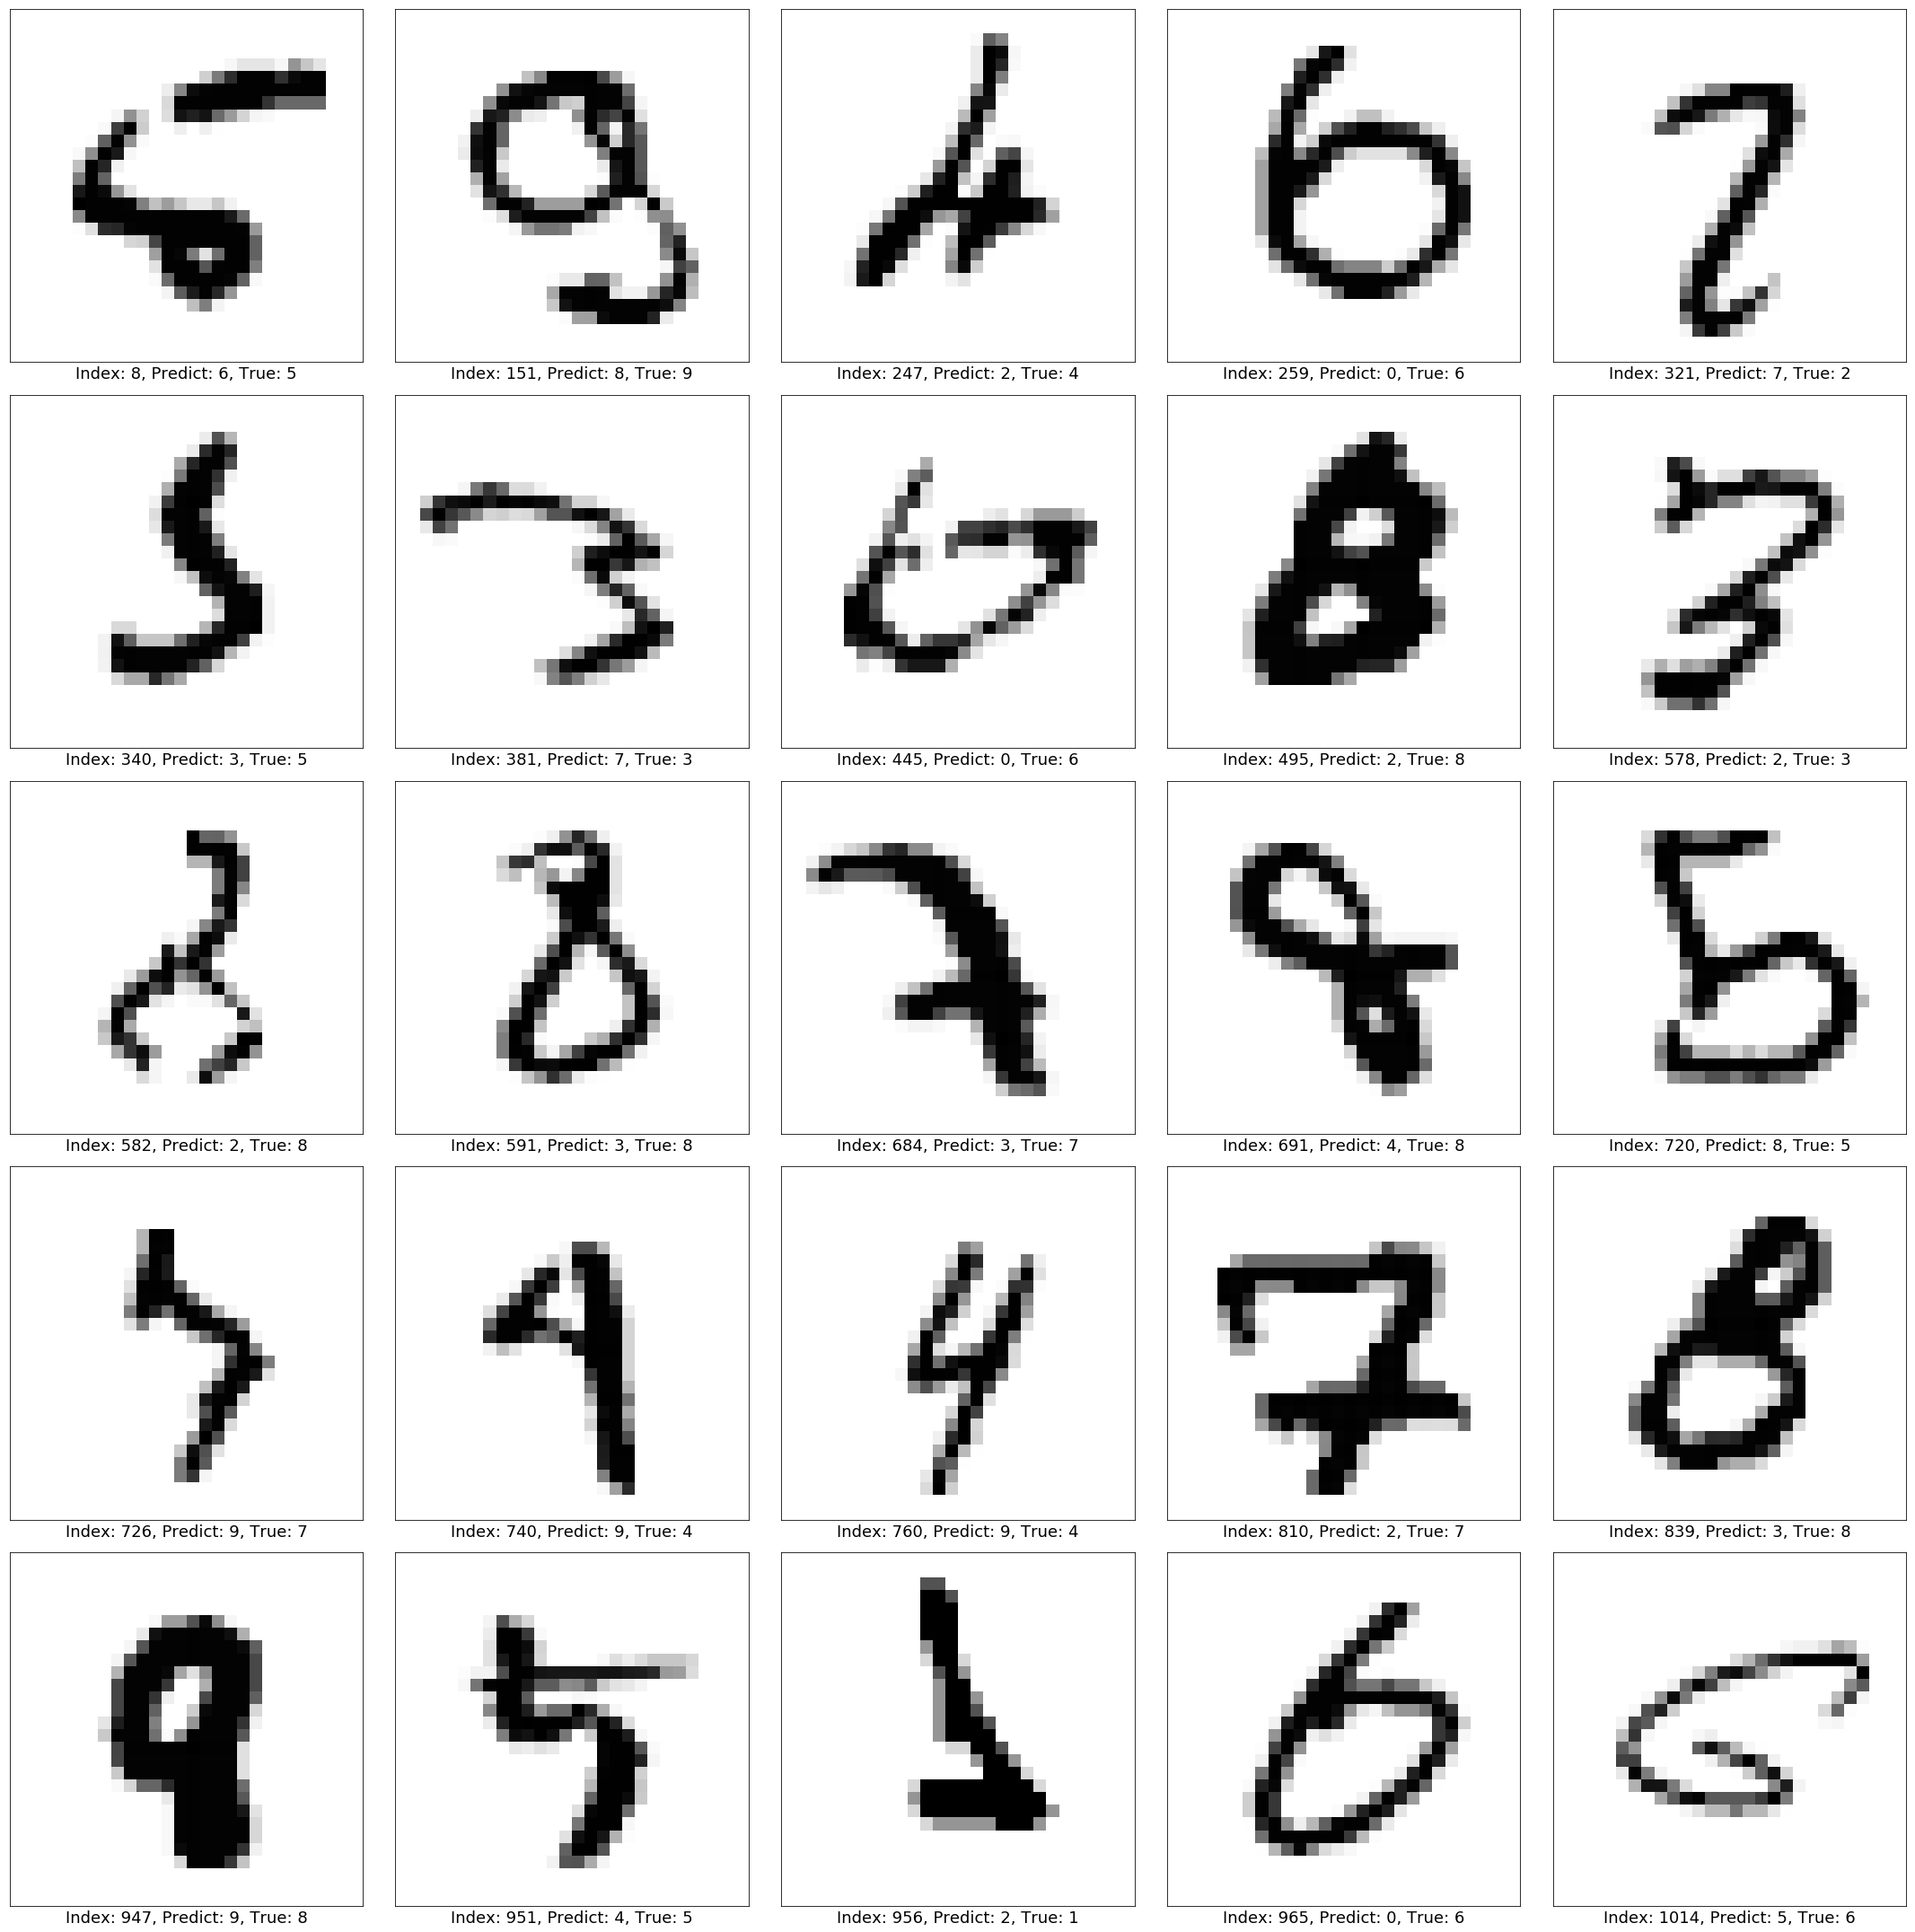

In [66]:
wrong_index = list(wrong.index)
print("Number of false predicted image:", len(wrong_index))
some_wrong = 25
print("The first {} indexes of wrong predict images: {}".format(some_wrong, wrong_index[:some_wrong]))
plt.subplots(5,5, figsize=(30,30))
for i in range(some_wrong):
    index = wrong_index[i]
    plt.subplot(5,5, i+1)
    plt.imshow(x_test[index], cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Index: {}, Predict: {}, True: {}".format(index, y_pred[index], y_test[index]), fontsize = 18)
    
plt.tight_layout()
plt.show()